## MTA Challenge Set  

Topic: Challenge Set 1  
Subject: Exploring MTA turnstile data  
Date of Submission: 10/1/2018  
Name: Andrée Werner  
Worked with Iggy, Laila, and Adam on this code, some of which we used on our group MTA project  
## Challenge 1
    
- Open and read MTA turnstile data. Import pandas libraries, merge and read txt files for june-sept 2018 into single dataframe 

In [39]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob


In [40]:
path = r'/Users/andreewerner/Desktop/metis'
allfiles = glob.glob(path + "/*.txt")
df = []
for file in allfiles:
    df.append(pd.read_csv(file))

df = pd.concat(df, ignore_index=True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Challenge 2
- Convert to Datetime. Add datetime column to dataframe, combining DATE and TIME columns
    

In [41]:
df['DATETIME'] = pd.to_datetime(df['DATE'].apply(str)+" "+df['TIME'],format="%m/%d/%Y %H:%M:%S")

## Challenge 3

- Find number of entries per turnstile per day. Create Unique ID Column for each turnstile by combining C/A, UNIT, SCP, and STATION columns into one. These 4 characteristics together define a unique turnstile in the system

In [42]:
df['UNIQUE ID'] = df['C/A']+df['UNIT']+df['SCP']+df['STATION']


- Next, sort data by unique id and date.  Find difference and take abs value of negative values in turnstile entries. Eliminate entries with no previous entries to subtract. Eliminate very large values (>10000 per turnstile per 4 hour period)

In [43]:
df2=df.sort_values(by=['UNIQUE ID','DATETIME'])

#take abs value to account for turnstiles that ran in reverse
df2['ENTRIES_COUNT']=abs(df2['ENTRIES'].diff())
df2['FIRST'] = df2.groupby('UNIQUE ID').cumcount()

#get rid of initial time differences
df2 = df2[df2['FIRST'] != 0]

#get rid of extreme values
df2 = df2[abs(df2['ENTRIES_COUNT']) < 10000]

#Make date col datetime object for later use
df2['DATE'] = pd.to_datetime(df2['DATE'],format="%m/%d/%Y")
df2['DAY_OF_WEEK'] = df2['DATE'].dt.day_name()
df2['WEEK'] = df2['DATE'].dt.week




- Next, sum days together by date

In [44]:
df_entries=df2.groupby('DATE')['ENTRIES_COUNT'].sum()



## Challenge 4

- Plot  total entries for each day with matplotlib functions

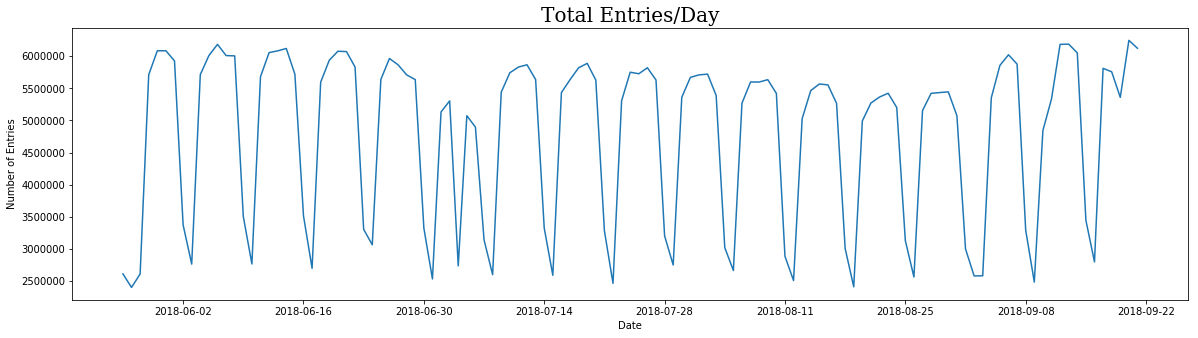

In [45]:
dates = df_entries.index
counts = df_entries.values
plt.figure(figsize=(20,5))
plt.plot(dates,counts)
plt.title('Total Entries/Day',family='serif',fontsize = 20,loc='center',color='k');
plt.xlabel('Date');
plt.ylabel('Number of Entries');
plt.show()

- Now show just show total entries for one turnstile ('A002R05102-00-0059 ST') 

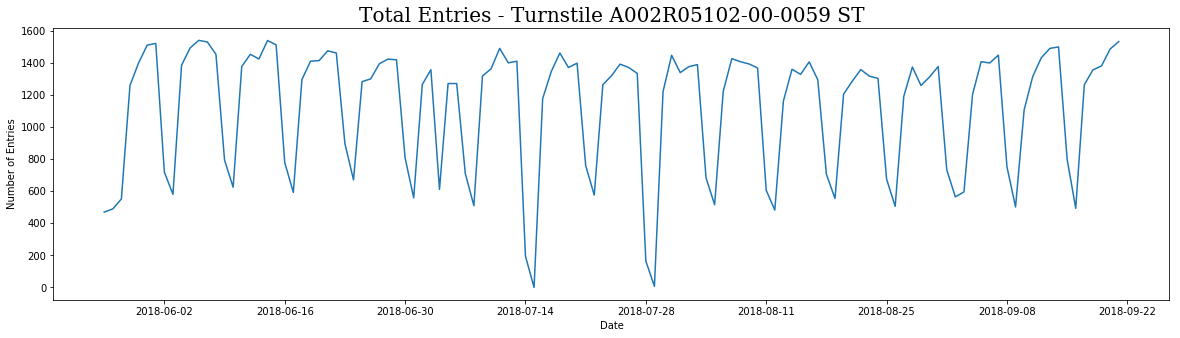

In [46]:
df_single_turnstile = df2.loc[df2['UNIQUE ID'] == 'A002R05102-00-0059 ST']
df_single_turnstile_day=df_single_turnstile.groupby('DATE')['ENTRIES_COUNT'].sum()
dates = df_single_turnstile_day.index
counts = df_single_turnstile_day.values
plt.figure(figsize=(20,5))
plt.plot(dates,counts)
plt.title('Total Entries - Turnstile A002R05102-00-0059 ST',family='serif',fontsize = 20,loc='center',color='k');
plt.xlabel('Date');
plt.ylabel('Number of Entries');
plt.show()


## Challenge 5

- Get turnstile counts per (C/A, UNIT, STATION). Used groupby to combine turnstile data, organized by entries/day

In [47]:
df_turnstile_counts=df2.groupby(['C/A','UNIT','STATION','DATE'])['ENTRIES_COUNT'].sum()


## Challenge 6

- Used groupby to find total entries by station

In [48]:
df_station = df2.groupby(['STATION','DATE'])['ENTRIES_COUNT'].sum()


## Challenge 7

- Plot time series for single station. Isolate 1st Avenue station and plot entries/day

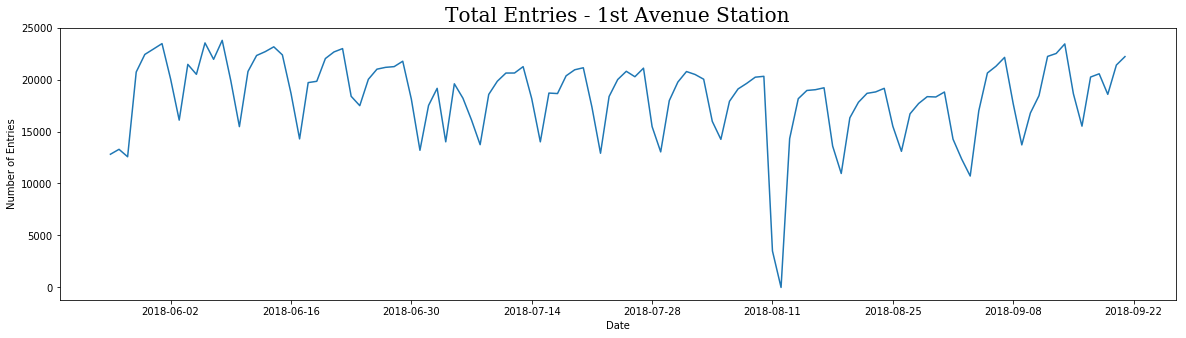

In [49]:
df_single_station = df_station.reset_index()
df_single_station = df_single_station[df_single_station['STATION']=='1 AV']
dates = df_single_station['DATE']
counts = df_single_station['ENTRIES_COUNT']
plt.figure(figsize=(20,5))
plt.plot(dates,counts)
plt.title('Total Entries - 1st Avenue Station',family='serif',fontsize = 20,loc='center',color='k');
plt.xlabel('Date');
plt.ylabel('Number of Entries');
plt.show()


## Challenge 8
- Plot weekly time series for one station over many weeks. Find days the of the week and week numbers then plot
    

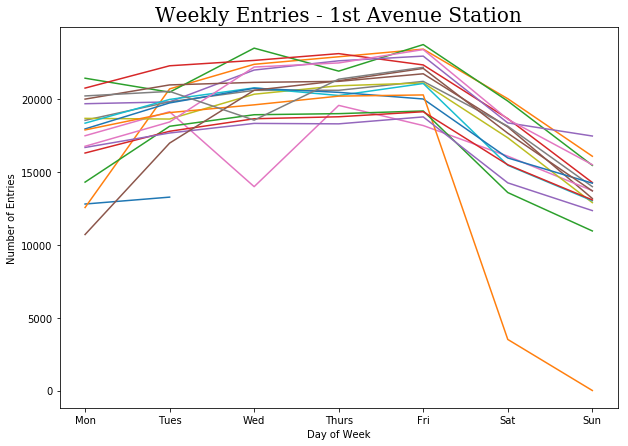

In [50]:
df_single_station['DATE'] = pd.to_datetime(df_single_station['DATE'])
df_single_station['DAY OF WEEK'] = df_single_station['DATE'].dt.day_name()
df_single_station['WEEK'] = df_single_station['DATE'].dt.week


fig,ax = plt.subplots(figsize=(10,7))
df_single_station.groupby('WEEK').plot(y='ENTRIES_COUNT',x='DAY OF WEEK', ax=ax,legend=False) 
plt.title('Weekly Entries - 1st Avenue Station',family='serif',fontsize = 20,loc='center',color='k');
plt.xlabel('Day of Week');
plt.ylabel('Number of Entries');
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Wed Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);


## Challenge 9
- Get total entries for each station. First change station series to dataframe, then groupby only by station now to get entries. 

In [53]:
df_station = df_station.to_frame()
df_station = df_station.groupby(["STATION"])["ENTRIES_COUNT"].sum()


## Challenge 10
- Plot rider distribution for top (highest to lowest) stations in bar chart

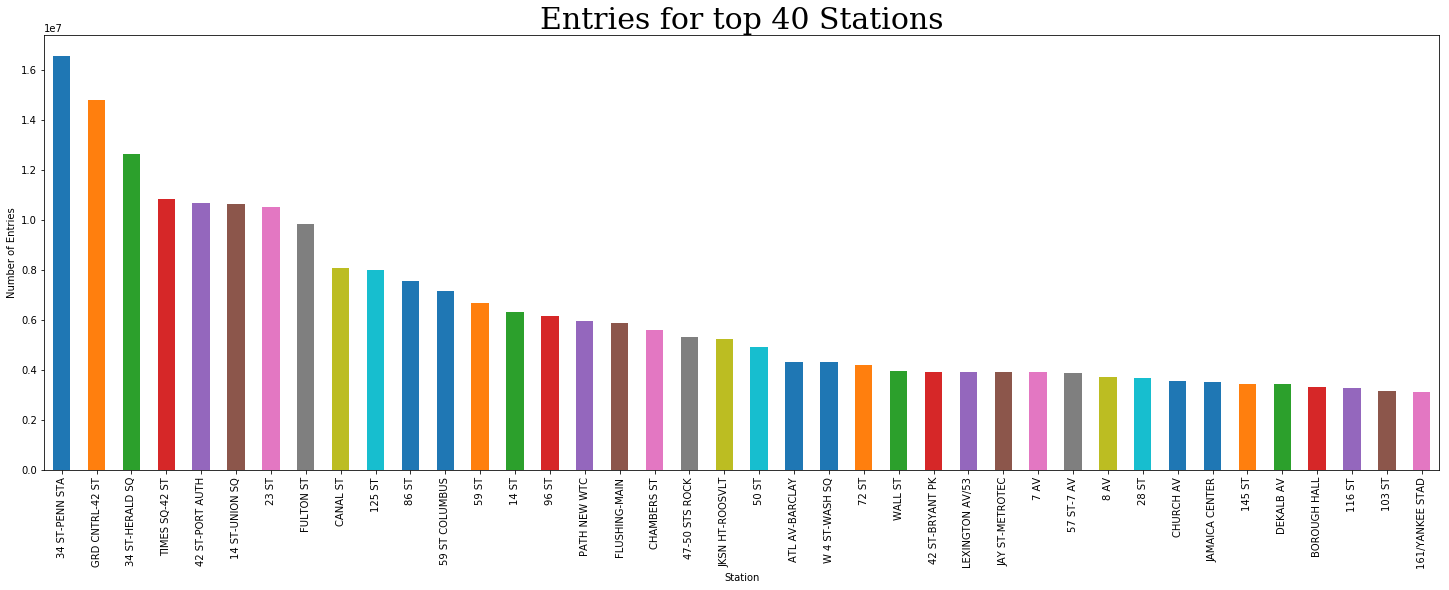

In [55]:
df_station.sort_values(inplace = True, ascending = False)

plt.figure(figsize=(25,8))
df_station.iloc[0:40].plot.bar()
plt.title('Entries for top 40 Stations',family='serif',fontsize = 30,loc='center',color='k');
plt.xlabel('Station');
plt.ylabel('Number of Entries');
